# Capstone Project - Car Accident Severity (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Data <a name="data"></a>

The data was collected by the seattle police department and Accident traffic records department from 2004 to present.

The data consists of 37 independent variables and 194,673 rows. The dependent variable, “SEVERITYCODE”, contains numbers that correspond to different levels of severity caused by an accident from 0 to 4

### Load Data from CSV file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Data-Collisions.csv')
data.head()

C:\Users\yinka\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Data Preprocessing

In [3]:
from sklearn import preprocessing
#Converting Severity Code from (1/2) to (0/1)
severity_code = data['SEVERITYCODE'].values

labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)

data["SEVERITYCODE"] = severity_code
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,0,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,0,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,0,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,1,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Exploratory Data Analysis

In [4]:
descriptive_stats = data.describe(include = 'all')
descriptive_stats

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1780512,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,0.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,0.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,0.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,0.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,1.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


C:\Users\yinka\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


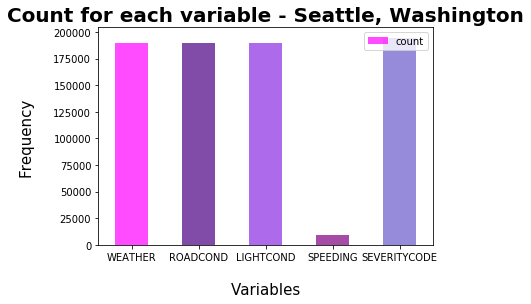

In [5]:
#Plotting counts of selected variables
descriptive_stats_plot=descriptive_stats[["WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()

color = ['fuchsia','indigo','blueviolet','purple','slateblue']
descriptive_stats_plot.plot(kind='bar',alpha=0.70,color=[color])
plt.title('Count for each variable - Seattle, Washington', fontsize=20, fontweight='bold')
plt.xlabel("Variables",fontsize=15,labelpad=20)
plt.ylabel("Frequency",fontsize=15,labelpad=20)
plt.xticks(rotation=360)
plt.show()

In [6]:
data['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [7]:
data['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [8]:
data["LIGHTCOND"].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [9]:
data['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

### Convert Categorical features to numerical values

In [10]:
data["WEATHER"] = data["WEATHER"].astype('category')
data["ROADCOND"] = data["ROADCOND"].astype('category')
data["LIGHTCOND"] = data["LIGHTCOND"].astype('category')
data.dtypes

SEVERITYCODE         int64
X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE.1       int64
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE         int64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER           category
ROADCOND          category
LIGHTCOND         category
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
SEGLANEKEY           int64
CROSSWALKKEY         int64
H

In [11]:
data["WEATHER_cat"] = data["WEATHER"].cat.codes
data["ROADCOND_cat"] = data["ROADCOND"].cat.codes
data["LIGHTCOND_cat"] = data["LIGHTCOND"].cat.codes

data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,WEATHER_cat,ROADCOND_cat,LIGHTCOND_cat
0,1,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,NaN,NaN,10,Entering at angle,0,0,N,4,8,5
1,0,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,6,8,2
2,0,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,4323031.0,NaN,32,One parked--one moving,0,0,N,4,0,5
3,0,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,NaN,NaN,23,From same direction - all others,0,0,N,1,0,5
4,1,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,4028032.0,NaN,10,Entering at angle,0,0,N,6,8,5


In [12]:
feature = data[["WEATHER_cat","ROADCOND_cat","LIGHTCOND_cat","SEVERITYCODE"]]
feature.head()

,WEATHER_cat,ROADCOND_cat,LIGHTCOND_cat,SEVERITYCODE
0,4,8,5,1
1,6,8,2,0
2,4,0,5,0
3,1,0,5,0
4,6,8,5,1


In [13]:
feature.dtypes

WEATHER_cat       int8
ROADCOND_cat      int8
LIGHTCOND_cat     int8
SEVERITYCODE     int64
dtype: object

In [14]:
feature["SEVERITYCODE"].value_counts()

0    136485
1     58188
Name: SEVERITYCODE, dtype: int64

### Balancing the Dataset

In [15]:
#balancing the data set
from sklearn.utils import resample
sev_maj = feature[feature.SEVERITYCODE==0]
sev_min = feature[feature.SEVERITYCODE==1]

sev_maj_dsample = resample(sev_maj, replace=False, n_samples=58188, random_state=123)

balanced_feature = pd.concat([sev_maj_dsample, sev_min])

balanced_feature.SEVERITYCODE.value_counts()

1    58188
0    58188
Name: SEVERITYCODE, dtype: int64

In [16]:
balanced_feature

,WEATHER_cat,ROADCOND_cat,LIGHTCOND_cat,SEVERITYCODE
25055,6,8,2,0
65280,1,0,5,0
86292,10,7,8,0
155111,1,0,5,0
64598,1,0,5,0
119954,1,0,5,0
64063,1,0,5,0
105379,1,0,5,0
181211,-1,-1,-1,0
187708,1,0,5,0


### Feature selection

In [17]:
X = balanced_feature.drop('SEVERITYCODE', axis=1)
y = balanced_feature['SEVERITYCODE']


In [18]:
X.head()

,WEATHER_cat,ROADCOND_cat,LIGHTCOND_cat
25055,6,8,2
65280,1,0,5
86292,10,7,8
155111,1,0,5
64598,1,0,5


In [19]:
y.head()

25055     0
65280     0
86292     0
155111    0
64598     0
Name: SEVERITYCODE, dtype: int64

### Normalize Data

In [20]:
#standardization 
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

C:\Users\yinka\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\yinka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int8 were all converted to float64 by StandardScaler.
  


array([[ 1.15236718,  1.52797946, -1.21648407],
       [-0.67488   , -0.67084969,  0.42978835],
       [ 2.61416492,  1.25312582,  2.07606076],
       [-0.67488   , -0.67084969,  0.42978835],
       [-0.67488   , -0.67084969,  0.42978835]])

### Splitting Data into training and testing set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (81463, 3) (81463,)
Test set: (34913, 3) (34913,)


# Building Classification models

# K Nearest Neighbor(KNN)

In [24]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 26
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    Kyhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, Kyhat)

    
    std_acc[n-1]=np.std(Kyhat==y_test)/np.sqrt(Kyhat.shape[0])

mean_acc

array([0.51800189, 0.51184373, 0.55414888, 0.51144273, 0.55042534,
       0.55578151, 0.55157105, 0.56045026, 0.55518002, 0.55088363,
       0.55595337, 0.55996334, 0.5608799 , 0.56053619, 0.56056483,
       0.5604789 , 0.56036433, 0.56039298, 0.56024976, 0.56024976,
       0.56466073, 0.55987741, 0.56408788, 0.56371552, 0.56400195])

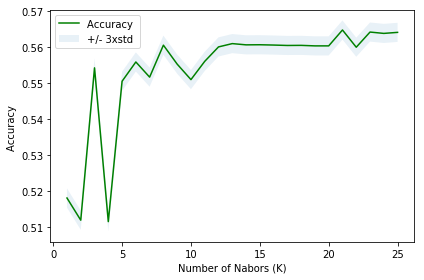

The best accuracy was with 0.5646607280955518 with k= 21


In [25]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

# Decision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)

# Train model and predict
tree.fit(X_train,y_train)
DTyhat = tree.predict(X_test)
print (DTyhat [0:5])
print (y_test [0:5])

[1 1 0 0 1]
121808    1
172281    1
57658     0
137627    0
29728     0
Name: SEVERITYCODE, dtype: int64


# Logistic Regression

In [38]:
# logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=6, solver='liblinear').fit(X_train,y_train)
LRyhat = LR.predict(X_test)
LRyhat [0:5]

array([0, 1, 0, 0, 0], dtype=int64)

# Result and Evaluation

In [39]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# KNN

In [40]:
# jaccard similiarity score
jaccard_similarity_score(y_test, Kyhat)

0.564001947698565

In [41]:
# F1 score
f1_score(y_test, Kyhat, average='weighted')

0.5404623326586121

# Decision tree

In [42]:
# jaccard similiarity score
jaccard_similarity_score(y_test, DTyhat)

0.5664365709048206

In [43]:
# F1 score
f1_score(y_test, DTyhat, average='weighted')

0.5453281333043194

# logistic Regression

In [46]:
# jaccard similiarity score
jaccard_similarity_score(y_test, LRyhat)

0.5260218256809784

In [47]:
# F1 score
f1_score(y_test, LRyhat, average='weighted')

0.5118304444406577

In [48]:
# LOGLOSS
yhat_prob = LR.predict_proba(X_test)
log_loss(y_test, yhat_prob)

0.6849535383198887

# Report
#####  You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.564   | 0.540    | NA      |
| Decision Tree      | 0.566   | 0.545    | NA      |
| LogisticRegression | 0.526   | 0.511    | 0.684   |

Based on the above report, Decision tree is the best model to predict car accident severity.